In [1]:
import os
from random import sample
import pandas as pd
from eyened_orm import ImageInstance, SourceInfo, DBManager
from eyened_orm.utils import get_config

# from rtnls_fundusprep.preprocessor import FundusPreprocessor
# from rtnls_fundusprep.utils import preprocess_for_inference
from sqlalchemy import select, func
from tqdm.notebook import tqdm
import pydicom
from pathlib import Path

In [2]:
from random import sample
from PIL import Image
import numpy as np
import cv2
from eyened_orm.importer.thumbnails import get_thumbnail

In [3]:
config = get_config("eyened")
DBManager.init(config)
session = DBManager.get_session()

In [4]:
# images = (
#     session.execute(
#         select(ImageInstance)
#     )
#     .scalars()
#     .all()
# )

In [5]:
images = session.execute(select(ImageInstance).order_by(func.random()).limit(1000)).scalars().all()

In [6]:
images_binary = [im for im in images if im.path.endswith(".binary")]
images_dicom = [im for im in images if im.path.endswith(".dcm")]
images_png = [im for im in images if im.path.endswith(".png")]

In [7]:
def plot(ims_sample):
    import numpy as np

    import matplotlib.pyplot as plt
    
    fig, axs = plt.subplots(2, 4, figsize=(15, 8))
    axs = axs.flatten()

    for i, (im) in enumerate(ims_sample):
        print(im.ImageInstanceID, im.path)
        # try:
        # Use the read_thumbnail function defined earlier to get the image
        if im.path.endswith(".json"):
            continue
        img = get_thumbnail(im)
        # print(img)
        if img is not None:
            if img.ndim == 3:
                axs[i].imshow(img)
            else:
                axs[i].imshow(img, cmap="gray")
        # except Exception as e:
            # print(f'Error: {str(e)}')
        
        axs[i].set_title(f"ID: {im.ImageInstanceID}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

1090748 /mnt/oogergo/ergo/HRA_ERGO/DATA/67943e8e-dd78-408e-a85d-856b0465f4e1/00004328-00034557-AF_B-0-11.png
1137132 /mnt/oogergo/ergo/HRA_ERGO/DATA/bad7a09f-f777-4c54-b3ab-41d3c19612a4/00005641-00044818-AF_B-0-10.png
1054780 /mnt/oogergo/ergo/HRA_ERGO/DATA/2878e0a3-8ebb-4ec3-929f-979ecf2b6f9c/00001567-00012137-AF_B-0-5.png
236805 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/bc78b412-4d01-4bc3-9eca-fad2c48ffccb/18185.png
564070 /mnt/oogergo/ergo/CF_ERGO/DATA_IBASE/2d47cea6-d21f-4e89-bb55-62a50453fd92/2TNVH5GI2TNVRQM3.png
546163 /mnt/oogergo/ergo/CF_ERGO/DATA_IBASE/1ab678d2-122b-440d-a1df-c7ad59ead40f/4568V16B456AKVQB.png
880105 /mnt/oogergo/ergo/HRA_ERGO/DATA/e788cfbb-787c-4de2-992e-8d5a80cf7f3f/00009597-00079495-AF_B-0-6.png
517659 /mnt/oogergo/ergo/CF_ERGO/DATA/863a5a3a-7338-40f0-a811-95f98a5d4cf1/00000231-FUN-OD-20000208-001-001.png


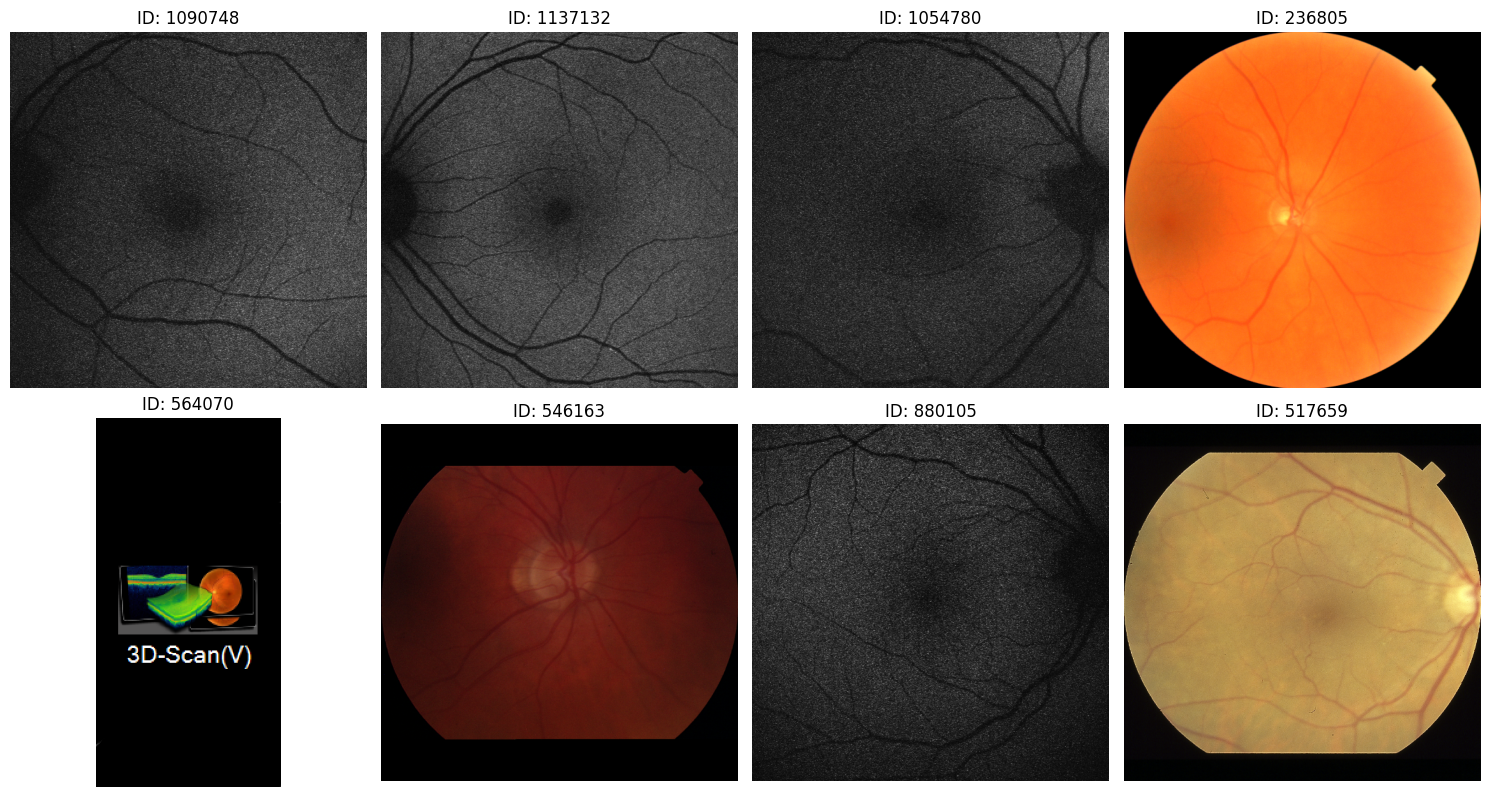

In [8]:
ims_sample = sample(images_png, 8)
plot(ims_sample)

1221358 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.44844.585/OPt.1.2.392.200106.1651.6.2.1048892848179.3874644105.58.dcm
2192229 /mnt/oogergo/eyened/uitwissel/radboud_mahfam2023/extracted/056080/20220128/L/CFP_SC.1.2.392.200106.1651.6.2.10808616323148.3852359264.15.dcm
2121569 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45087.11322/OPt.1.2.392.200106.1651.6.2.1048892848179.3895641174.161.dcm
2488451 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45663.22762/OPb.1.2.392.200106.1651.6.2.1048892848179.3963028693.62.dcm
2198109 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45229.21693/OPb.1.2.392.200106.1651.6.2.1048892848179.3882419383.185.dcm
2197677 /mnt/oogergo/ergo/TRITON_ERGO/dicom/StudyInstance_1.2.392.200106.1651.6.2.1048892848179.45227.655/SC.1.2.392.200106.1651.6.2.1048892848179.3907664974.123.dcm
2228412 /mnt/

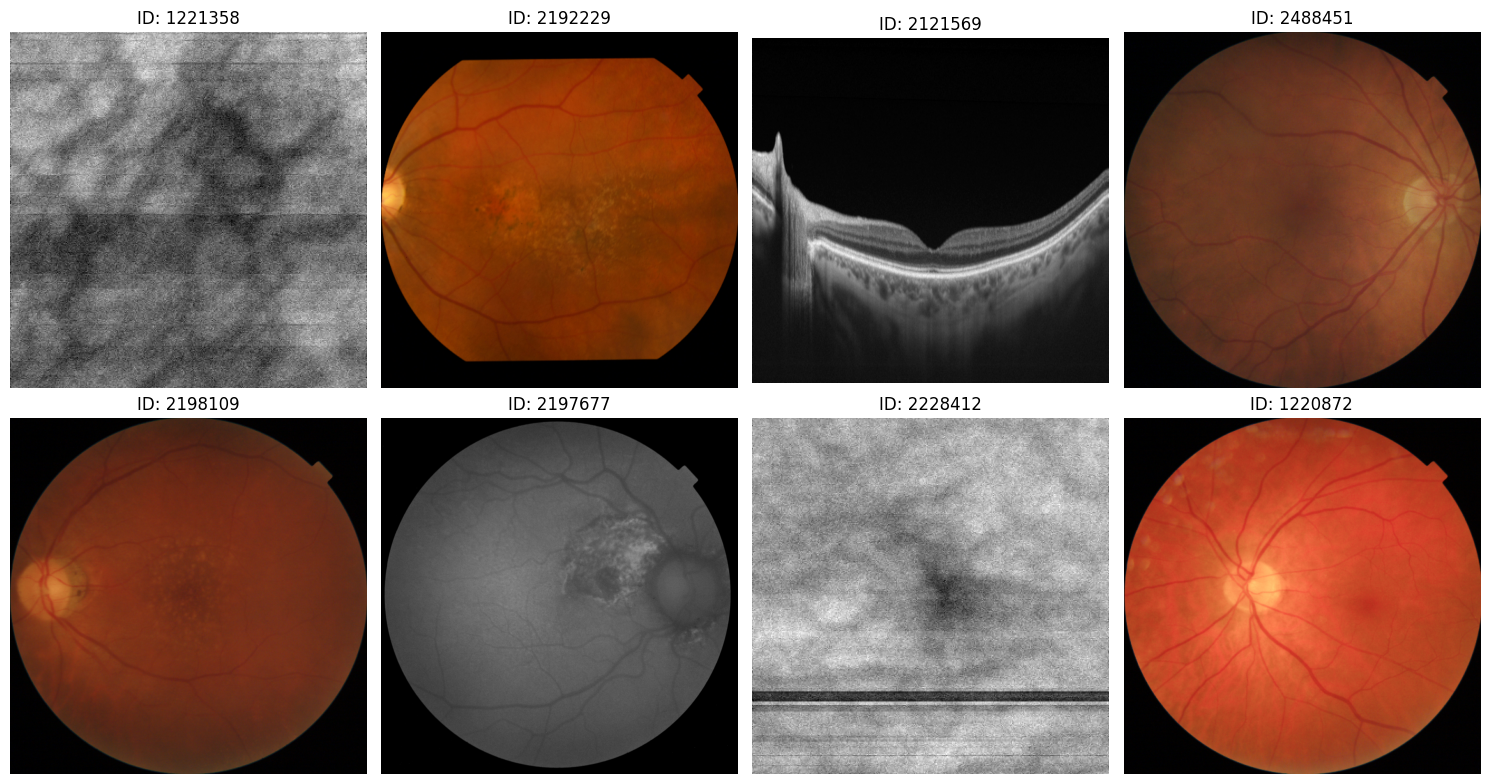

In [9]:
ims_sample = sample(images_dicom, 8)
plot(ims_sample)

366317 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/0f9a4d15-64e9-4993-af45-897a63bf4c4e/64135.binary
229021 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/0c2a4f2e-12cc-454f-b19e-03308a5f65f6/14846.binary
318078 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/6ed10f2f-bc40-469c-9f55-d5e802b9839f/46197.binary
342759 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/49ec18cb-f4f1-48e9-b907-7b2105539a13/55624.binary
366770 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/aaeb595b-03f1-4880-bdac-e022976ad40a/64288.binary
220611 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/dd102c26-0858-40fa-abd9-be2a37bef84c/11244.binary
275561 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/22d85f6f-8fba-4ac6-8a28-1e0afa7ba322/31453.binary
213063 /mnt/oogergo/ergo/OCT_ERGO/OCT_prd/3f88fe78-4c3d-45c1-b338-815f634de24e/7959.binary


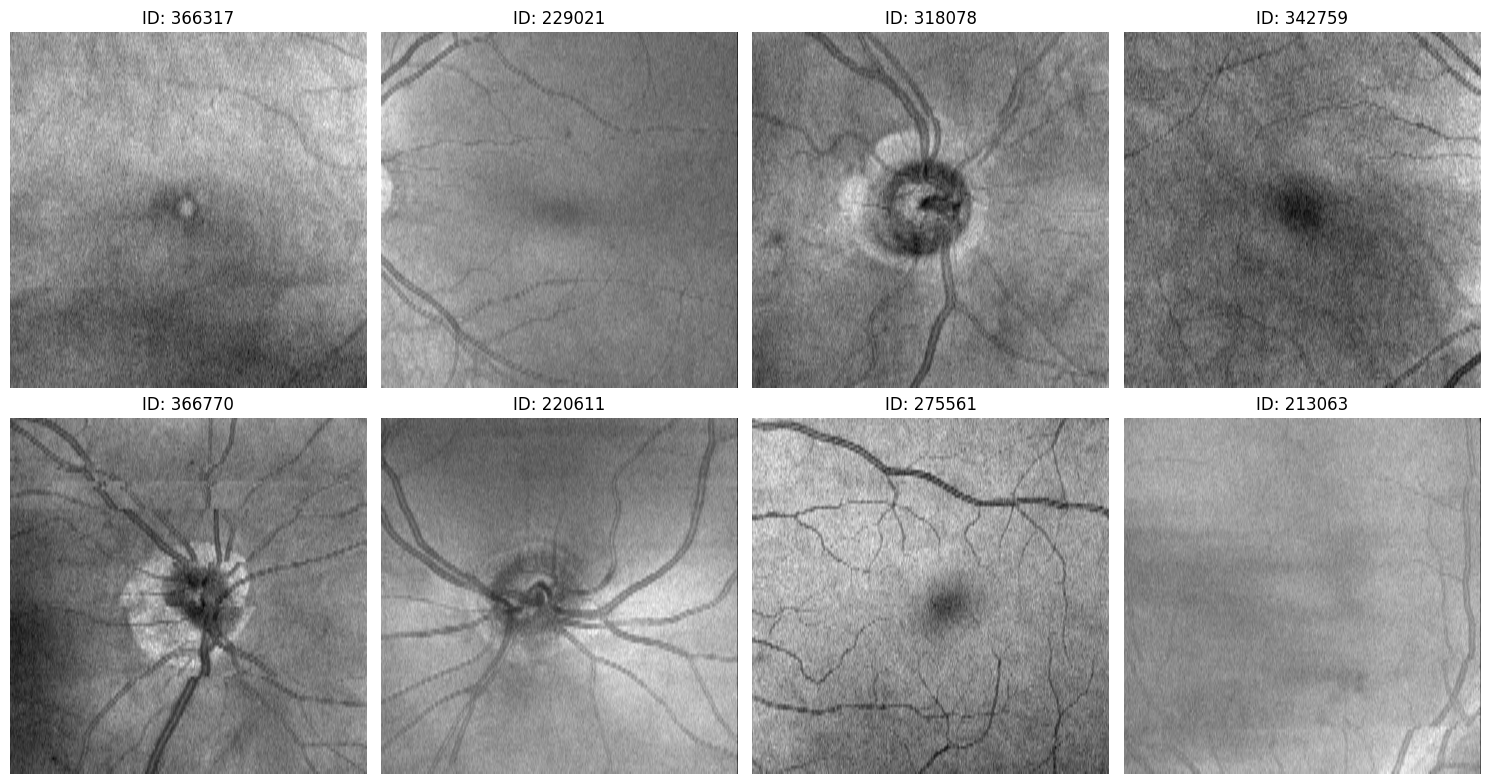

In [10]:
ims_sample = sample(images_binary, 8)
plot(ims_sample)